In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.decomposition import PCA

def pool_hidden_states(hidden_states: np.ndarray, pool: str = "mean") -> np.ndarray:
    """
    Pool hidden states over the token dimension.

    Parameters:
        hidden_states (np.ndarray): Array of shape (L, T, H)
        pool (str): Pooling method — "mean", "first", or "last"

    Returns:
        np.ndarray: Pooled embeddings of shape (L, H)
    """
    if pool == "mean":
        pooled = hidden_states.mean(axis=1)
    elif pool == "median":
        pooled = np.median(hidden_states, axis=1)
    elif pool == "first":
        pooled = hidden_states[ :, 0, :]
    elif pool == "last":
        pooled = hidden_states[ :, -1, :]
    else:
        raise ValueError(f"Unsupported pool type: {pool}")

    return pooled  # shape: (L, H)


metadata = pd.read_csv("outputs/book_of_life_sample_3.csv")


In [7]:
print('\n'.join(metadata.iloc[0:3].text.values))

A 41-year-old single female from Zwolle, born in Zwolle, earning 41,305 euros per year, has no history of cardiovascular disease.
A 68-year-old divorced male from Zwolle, born in Groningen, earning 35,514 euros per year, has no history of cardiovascular disease.
A 54-year-old divorced male from Maastricht, born in Maastricht, earning 41,376 euros per year, has no history of cardiovascular disease.


In [8]:
metadata.to_csv("outputs/book_of_life_sample_3.csv", index=None)

In [28]:
with open("outputs/book_of_life_hidden_states_all_layers_sample_3.pt", "rb") as f:
    data = pickle.load(f)

summarized = {}

for i in data.keys():
     temp = np.nan_to_num(pool_hidden_states(data[i], pool="median"), nan=0.0, posinf=0.0, neginf=0.0)
     summarized[i] = temp[-1]

In [29]:
embedding_df = pd.DataFrame.from_dict(summarized, orient="index")
embedding_df.index.name = "person_id"
embedding_df.reset_index(inplace=True)  # person_id becomes a column
metadata["person_id"] = metadata["person_id"].astype(int)  # ensure type match
merged = pd.merge(embedding_df, metadata, on="person_id", how="inner")
merged

/scratch/gpfs/TROYANSKAYA/sokolova/predicting-zygosity/ttenv/lib/python3.9/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
/scratch/gpfs/TROYANSKAYA/sokolova/predicting-zygosity/ttenv/lib/python3.9/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,person_id,0,1,2,3,4,5,6,7,8,...,5119,age,gender,income,city,birthplace,civil_status,nationality,cardio_history,text
0,0,1.109375,-1.171875,2.296875,0.292969,0.789062,-0.644531,0.429688,0.972656,-1.445312,...,-0.527344,41,female,41305,Zwolle,Zwolle,single,Dutch,0,"A 41-year-old single female from Zwolle, born ..."
1,1,0.951172,-0.184570,2.140625,-0.568359,0.892578,-0.503906,0.180420,1.554688,-1.351562,...,-0.298340,68,male,35514,Zwolle,Groningen,divorced,Dutch,0,"A 68-year-old divorced male from Zwolle, born ..."
2,2,0.445312,-0.151367,2.250000,-0.660156,0.648438,-0.460938,0.972656,1.312500,-1.585938,...,-0.063965,54,male,41376,Maastricht,Maastricht,divorced,Dutch,0,"A 54-year-old divorced male from Maastricht, b..."
3,3,0.910156,-0.714844,2.171875,-0.320312,0.914062,-0.570312,0.972656,2.093750,-1.187500,...,-0.316406,49,male,15000,Rotterdam,Groningen,divorced,Dutch,0,"A 49-year-old divorced male from Rotterdam, bo..."
4,4,1.789062,-0.182617,2.156250,1.109375,0.457031,-0.574219,0.644531,0.953125,-1.710938,...,-0.086426,32,female,36704,Eindhoven,Rotterdam,married,Dutch,0,"A 32-year-old married female from Eindhoven, b..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,1.132812,-0.466797,2.156250,-0.065430,0.410156,-1.101562,1.187500,2.000000,-1.445312,...,-0.734375,45,male,27762,Groningen,The Hague,widowed,Dutch,0,"A 45-year-old widowed male from Groningen, bor..."
96,96,0.503906,0.177734,2.000000,0.417969,1.187500,-0.652344,1.187500,0.187500,-1.593750,...,0.076172,46,female,38843,Eindhoven,Eindhoven,divorced,Dutch,0,"A 46-year-old divorced female from Eindhoven, ..."
97,97,1.609375,-0.091309,2.281250,0.417969,0.490234,-0.222656,0.294922,1.203125,-1.414062,...,-0.063965,43,female,45117,Amsterdam,Groningen,single,Dutch,0,"A 43-year-old single female from Amsterdam, bo..."
98,98,0.063538,-0.765625,1.917969,1.070312,0.352539,-0.751953,1.175781,0.707031,-1.355469,...,-0.755859,23,female,44150,Amsterdam,Nijmegen,widowed,Dutch,1,"A 23-year-old widowed female from Amsterdam, b..."


/tmp/ipykernel_756106/863182644.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_counts, x="gender", y="count", ax=axes[0], palette="Set2")
/tmp/ipykernel_756106/863182644.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_counts, x="city", y="count", ax=axes[2], palette="Set3")


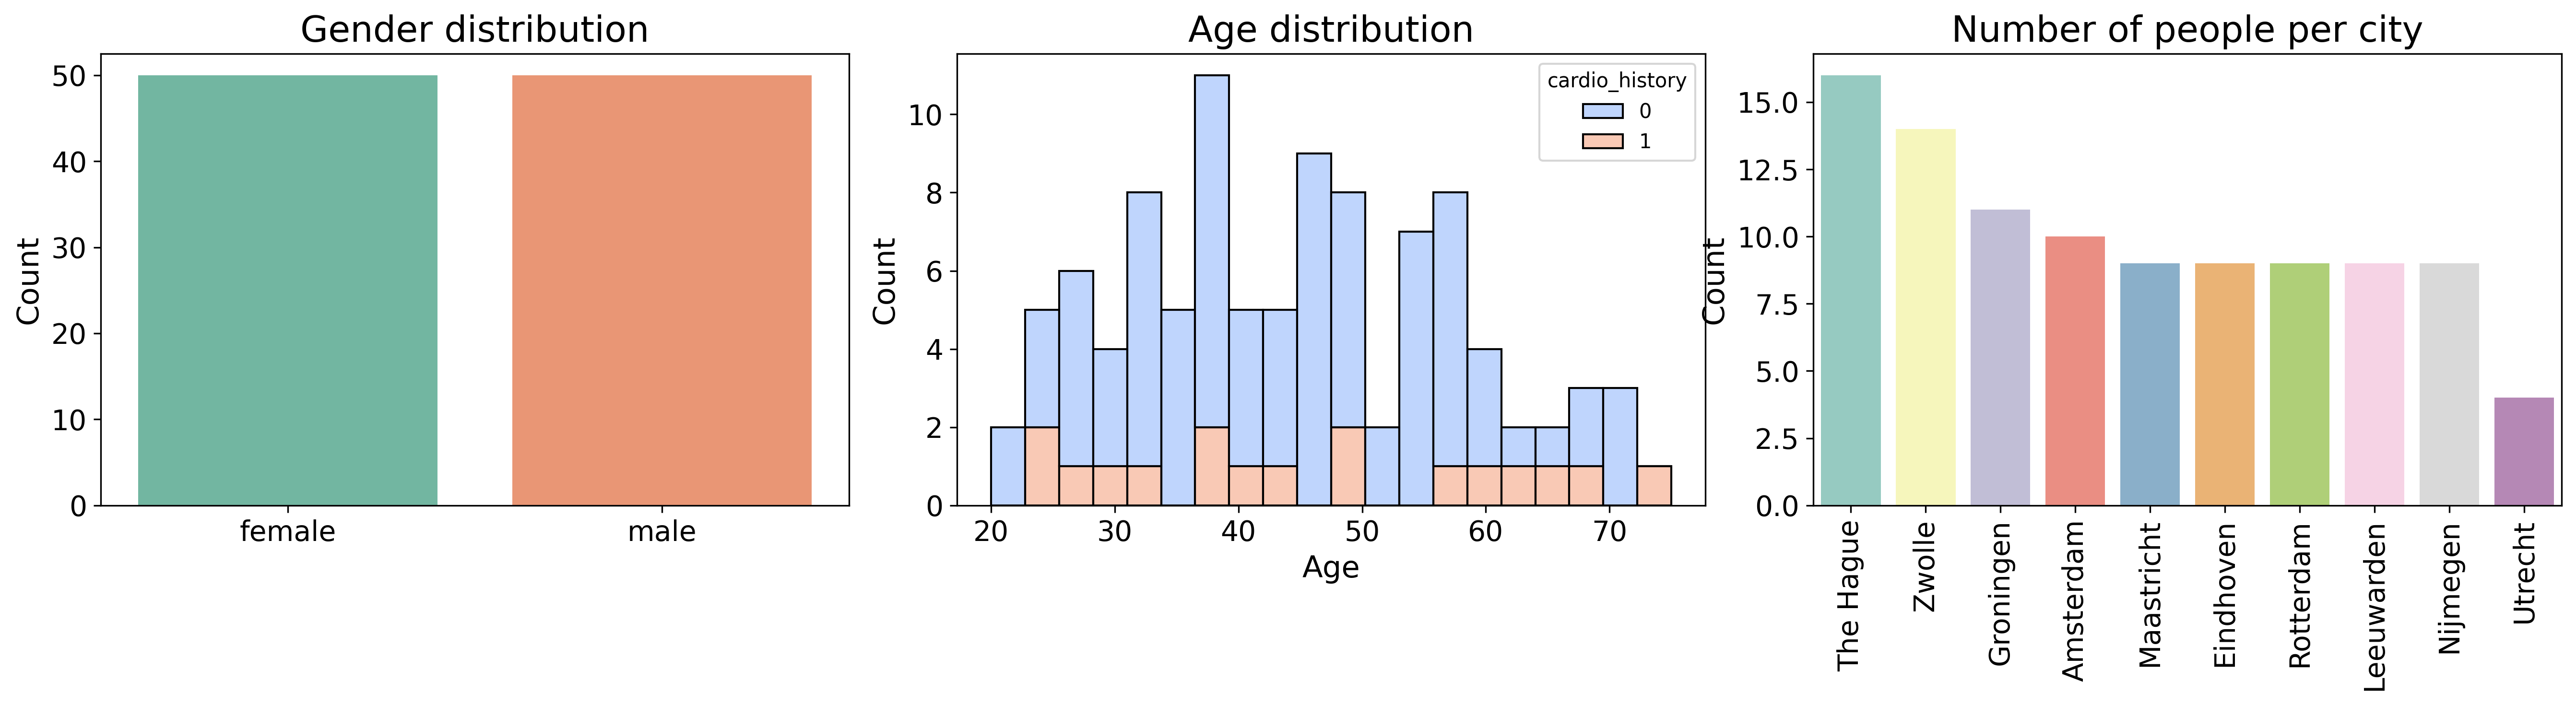

In [30]:
# Create figure and axes
fig, axes = plt.subplots(1, 3, figsize=(18, 5), dpi=300)

# Bar plot: gender counts
gender_counts = merged["gender"].value_counts().reset_index()
gender_counts.columns = ["gender", "count"]
sns.barplot(data=gender_counts, x="gender", y="count", ax=axes[0], palette="Set2")
axes[0].set_title("Gender distribution", fontsize=18)
axes[0].set_xlabel("")
axes[0].set_ylabel("Count", fontsize=15)

# Age distribution split by cardio_history
sns.histplot(data=merged, x="age", hue="cardio_history", multiple="stack", bins=20, 
             ax=axes[1], palette="coolwarm")
axes[1].set_title("Age distribution", fontsize=18)
axes[1].set_xlabel("Age", fontsize=15)
axes[1].set_ylabel("Count", fontsize=15)

# Bar plot: city counts
city_counts = merged["city"].value_counts().reset_index()
city_counts.columns = ["city", "count"]

# Plot all cities (sorted by count)
sns.barplot(data=city_counts, x="city", y="count", ax=axes[2], palette="Set3")
axes[2].set_title("Number of people per city", fontsize=18)
axes[2].tick_params(axis='x', rotation=90)
axes[2].set_xlabel("", fontsize=15)
axes[2].set_ylabel("Count", fontsize=15)
# increase ticks fontsize
for ax in axes:
    ax.tick_params(axis='both', labelsize=14)

# Final layout
plt.tight_layout()
plt.show()


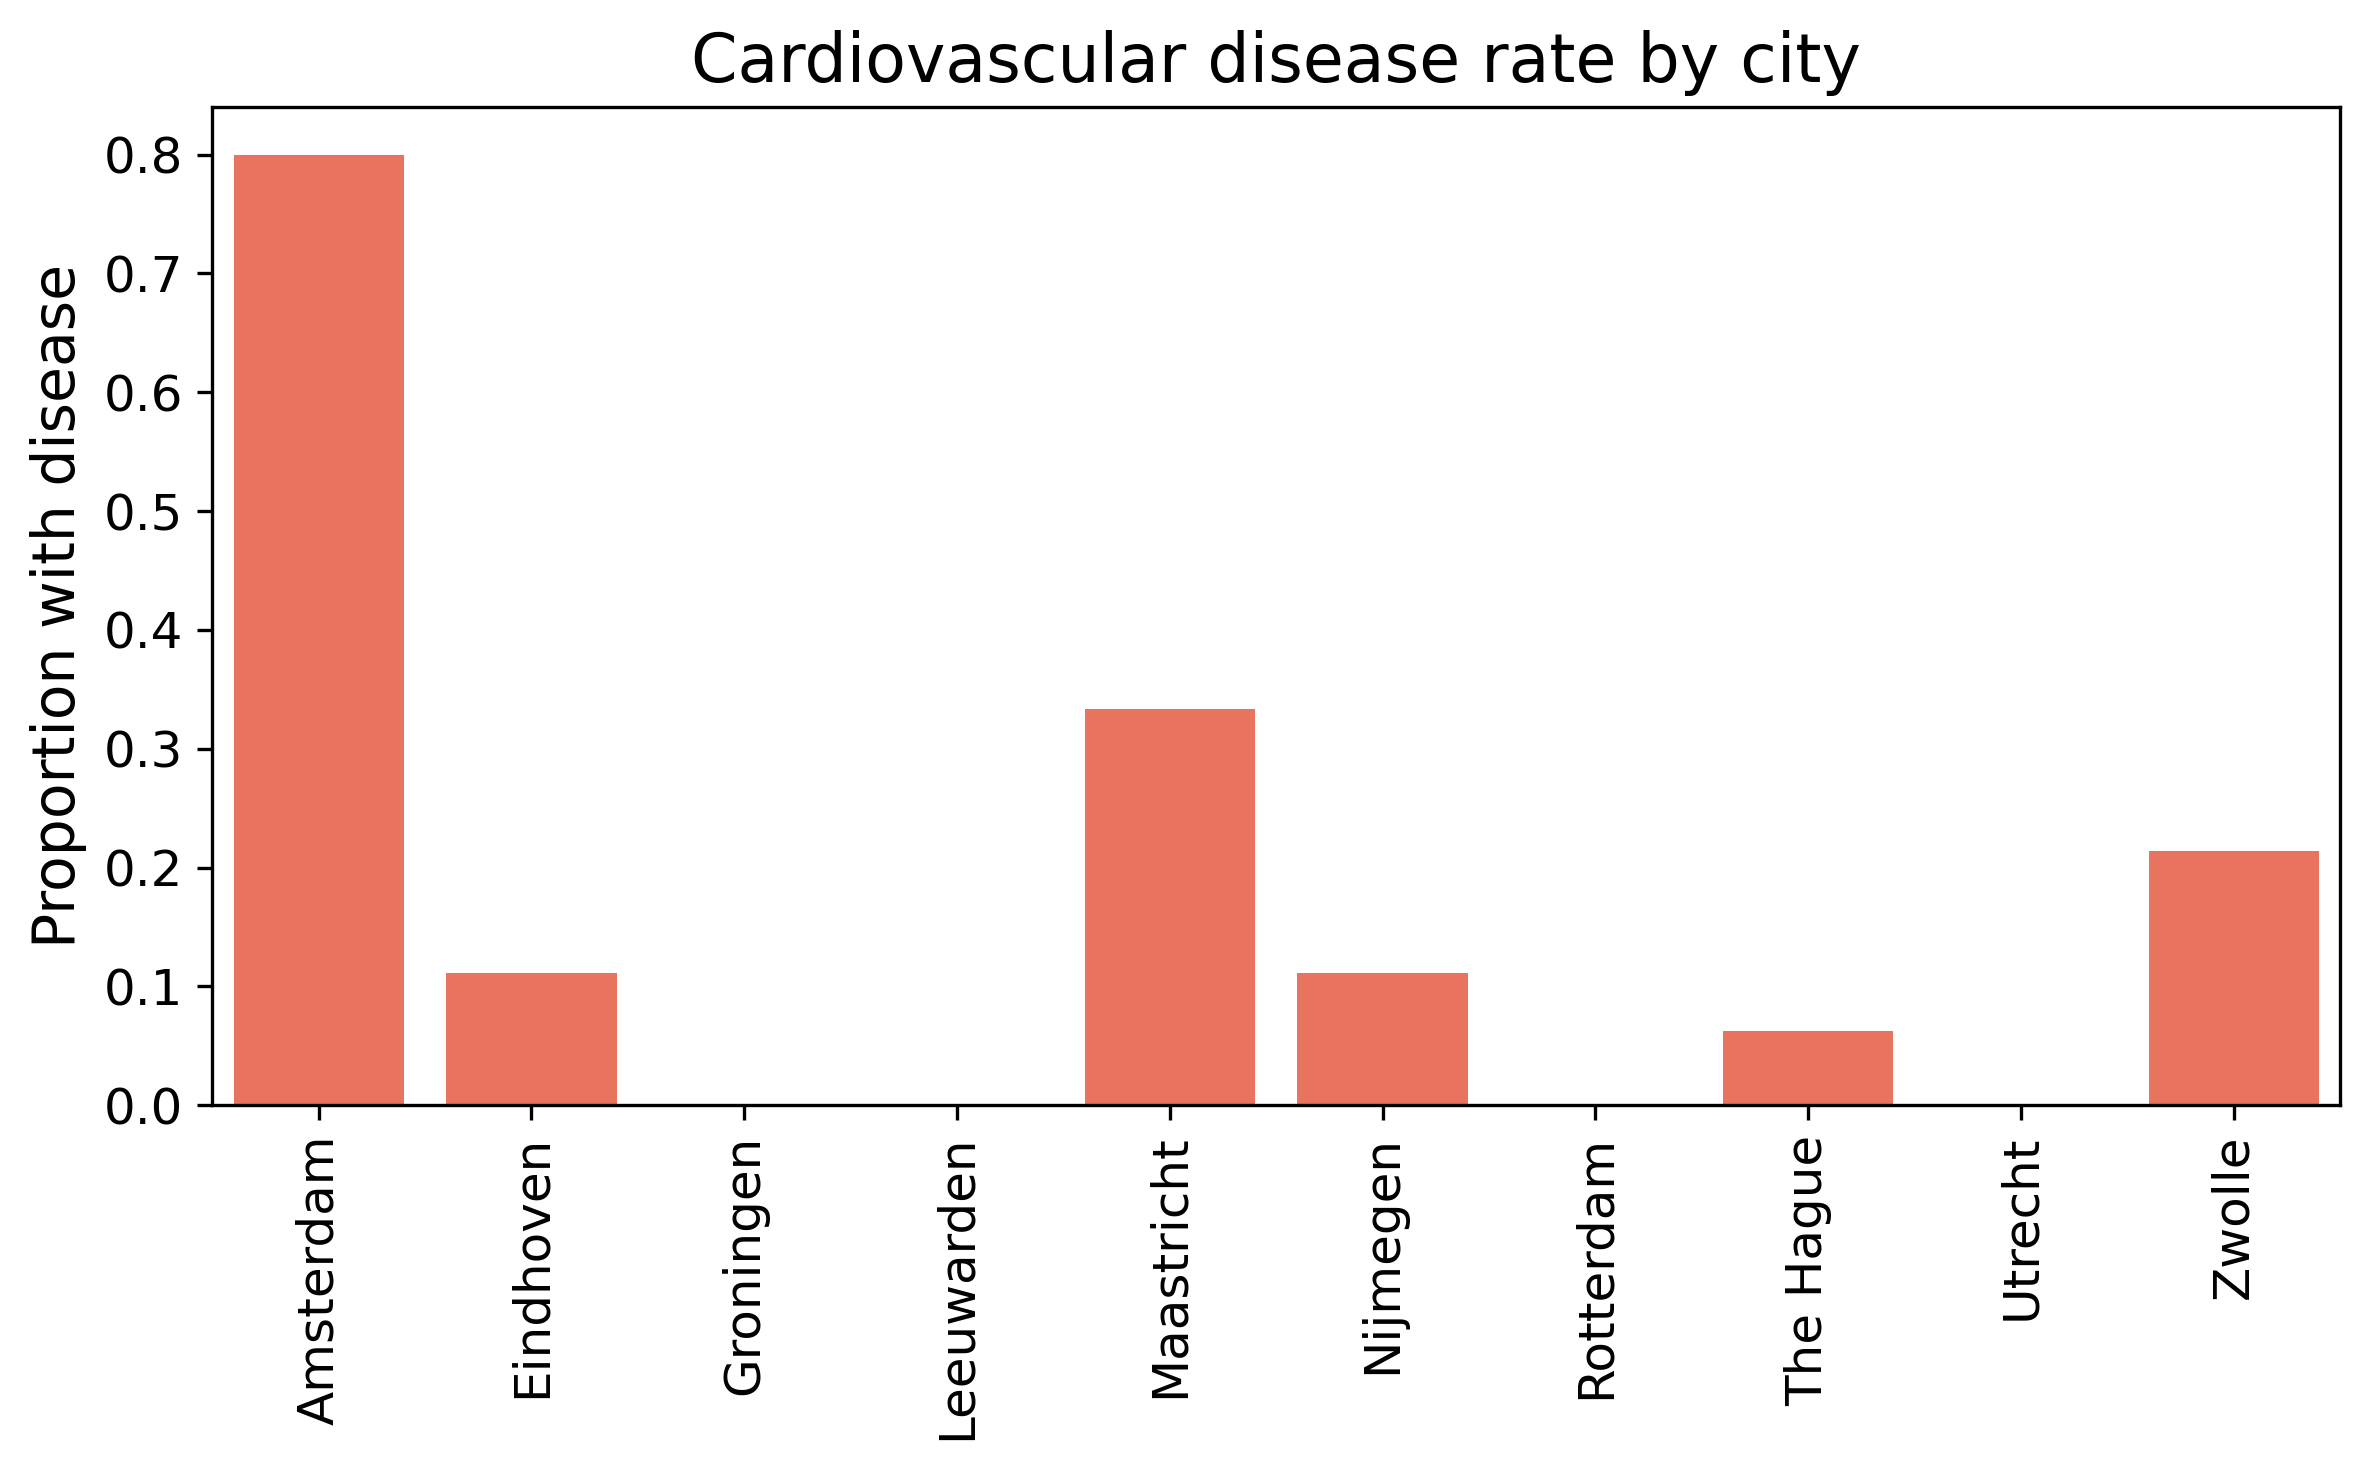

In [ ]:
# Count total and cardio cases per city
total_by_city = merged.groupby("city").size()
cardio_by_city = merged[merged["cardio_history"] == 1].groupby("city").size()
cardio_rate = (cardio_by_city / total_by_city).fillna(0).reset_index()
cardio_rate.columns = ["city", "cardio_rate"]

# Plot
plt.figure(figsize=(8, 5), dpi=300)
sns.barplot(data=cardio_rate, x="city", y="cardio_rate", color='tomato')
plt.title("Cardiovascular disease rate by city", fontsize=16)
plt.xlabel("", fontsize=14)
plt.ylabel("Proportion with disease", fontsize=14)
plt.xticks(rotation=90, ha="center", fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [32]:
X = merged.iloc[:, 1:embedding_df.shape[1]]  # only embedding columns
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
merged["pca1"] = X_pca[:, 0]
merged["pca2"] = X_pca[:, 1]

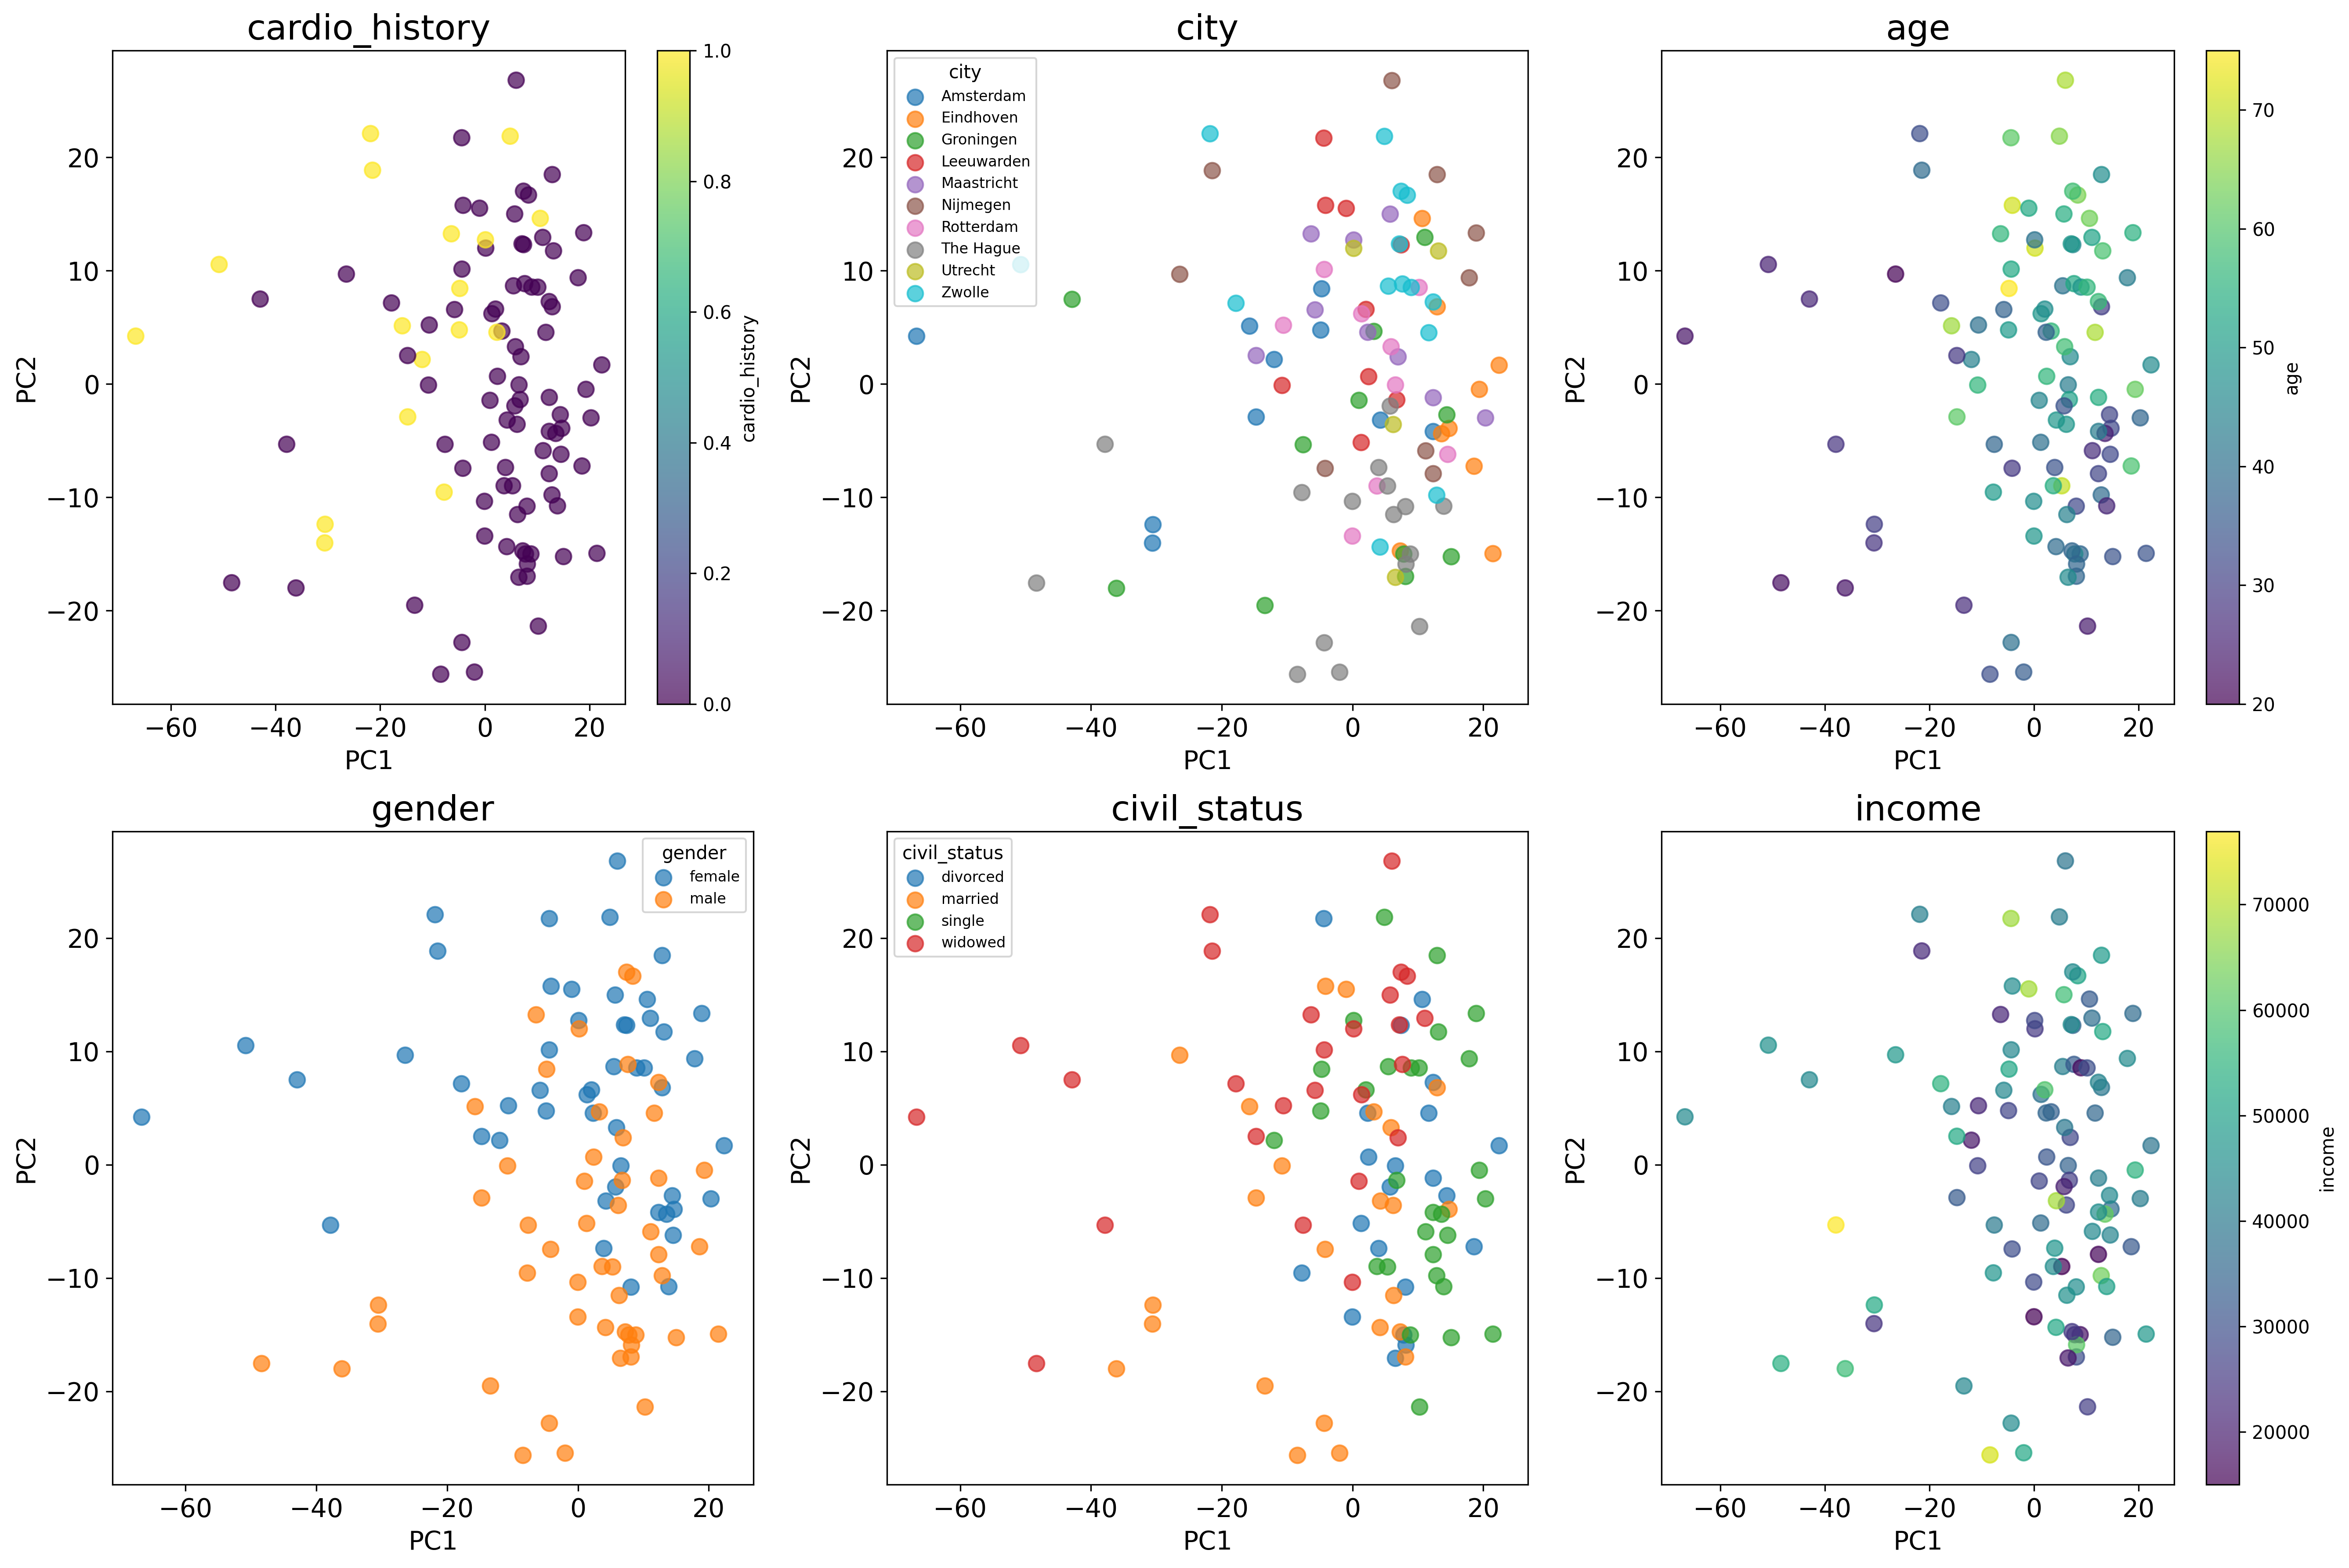

In [42]:

def plot_pca_by_column(df, color_by):
    plt.figure(figsize=(8, 6))
    values = df[color_by]

    if pd.api.types.is_numeric_dtype(values):
        scatter = plt.scatter(df["pca1"], df["pca2"], c=values, cmap="viridis", alpha=0.7)
        plt.colorbar(scatter, label=color_by)
    else:
        categories = values.astype("category")
        palette = plt.get_cmap("tab10")

        for i, category in enumerate(categories.cat.categories):
            subset = df[categories == category]
            plt.scatter(subset["pca1"], subset["pca2"],
                        label=str(category),
                        alpha=0.7,
                        color=palette(i % 10))  # wrap around if >10

        plt.legend(title=color_by, bbox_to_anchor=(1.05, 1), loc="upper left")

    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title(f"PCA colored by {color_by}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# plot_pca_by_column(merged, color_by="cardio_history")

def plot_pca_grid(df, columns, ncols=3, figsize=(18, 12)):
    nrows = -(-len(columns) // ncols)  # ceil division
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize, dpi=300)
    axes = axes.flatten()

    for idx, color_by in enumerate(columns):
        ax = axes[idx]
        values = df[color_by]

        if pd.api.types.is_numeric_dtype(values):
            scatter = ax.scatter(df["pca1"], df["pca2"], c=values, cmap="viridis", 
                                 alpha=0.7, s=73)
            fig.colorbar(scatter, ax=ax, label=color_by)
        else:
            categories = values.astype("category")
            palette = plt.get_cmap("tab10")
            for i, category in enumerate(categories.cat.categories):
                subset = df[categories == category]
                ax.scatter(subset["pca1"], subset["pca2"],
                           label=str(category),
                           alpha=0.7,
                           color=palette(i % 10), 
                           s=73)
            ax.legend(title=color_by, fontsize=8, loc="best")

        ax.set_title(color_by, fontsize=19)
        ax.set_xlabel("PC1", fontsize=14)
        ax.set_ylabel("PC2", fontsize=14)
        ax.tick_params(labelsize=14)

    # Remove any unused axes
    for j in range(len(columns), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_pca_grid(
    merged,
    columns=["cardio_history", "city", "age", "gender", "civil_status", "income"],
    ncols=3
)